Introduction to ML on my dataset

In [1]:

import matplotlib
import pysiology as pyd
import seaborn as sns
import pandas as pd
from matplotlib import pyplot, gridspec
import neurokit2 as nk2
import matplotlib.pyplot as plt
import statistics
import heartpy as hp
import numpy as np
import scipy as sci
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
from sklearn import preprocessing, model_selection
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import performance_metrics

Thank you for using Pysiology. If you use it in your work, please cite:
Gabrieli G., Azhari A., Esposito G. (2020) PySiology: A Python Package for Physiological Feature Extraction. In: Esposito A., Faundez-Zanuy M., Morabito F., Pasero E. (eds) Neural Approaches to Dynamics of Signal Exchanges. Smart Innovation, Systems and Technologies, vol 151. Springer, Singapore


importing and reading the head of the processed data given by Ryan

In [2]:
from tensorflow.python.feature_column import feature_column
ecg = pd.read_csv('./given_data/ecg.csv')
gsr = pd.read_csv('./given_data/gsr.csv')
labels = pd.read_csv('./given_data/labels.csv')

#removing unnecessary columns from data and concatenating into one dataset

gsr.drop(['gfgb'], axis=1,inplace=True)
ecg = ecg[['maxRR','minRR','meanRR','medianRR']]

dataset = pd.concat([ecg,gsr,labels], axis=1, join='inner').sort_index()
dataset.dropna()
dataset.head()


,maxRR,minRR,meanRR,medianRR,mean,variance,standard deviation,number of peaks,number of valleys,max,min,ratio of peak to time,labels
0,3.283373,-3.153124,-0.691292,-0.473422,-0.887344,-0.852428,-1.101827,-1.146055,-1.211860,-0.971536,0.473535,-1.240391,1
1,-0.530691,0.220757,-0.097092,-0.060457,1.728917,0.115263,0.413781,0.225144,0.150496,1.275972,1.869222,0.439346,0
2,-0.256929,0.437686,0.543713,0.614798,-0.219067,-0.241879,0.038038,0.613467,0.536314,-0.453982,-1.301779,1.602390,0
3,0.000886,0.828158,1.557349,1.368181,1.520551,0.954914,1.091541,0.643759,0.566410,1.668803,0.274025,0.478224,3
4,-0.153271,0.266695,0.508760,0.553411,-1.314357,-0.838620,-1.044152,-0.255806,-0.327352,-1.237303,-0.186352,-0.860474,1


Looking at the ecg plots

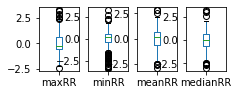

In [3]:
ecg.plot(kind='box', subplots=True, layout=(3,7), sharex=False, sharey=False)
pyplot.show()

Looking at the gsr plots

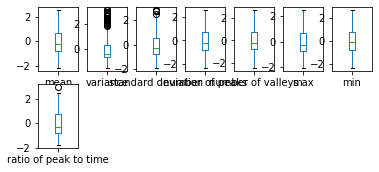

In [4]:
gsr.plot(kind='box', subplots=True, layout=(3,7), sharex=False, sharey=False)
pyplot.show()

Now looking for dataset

In [5]:
X = dataset.drop('labels', axis=1)
y = dataset['labels']

Random Forest

              precision    recall  f1-score   support

           0       0.57      0.59      0.58        78
           1       0.61      0.69      0.65        78
           2       0.61      0.50      0.55        78
           3       0.73      0.74      0.74        78

    accuracy                           0.63       312
   macro avg       0.63      0.63      0.63       312
weighted avg       0.63      0.63      0.63       312



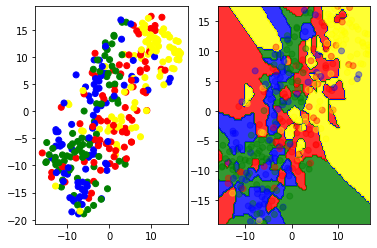

In [6]:
tsne_results  = TSNE(n_components=2).fit_transform(X)
df_subset = pd.DataFrame()

df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['tsne-2d-lab'] = y

fig, axs = plt.subplots(1,2)
colors = ['red','green','blue','yellow']
axs[0].scatter(df_subset['tsne-2d-one'],df_subset['tsne-2d-two'],c=y,cmap=matplotlib.colors.ListedColormap(colors))

rfc = RandomForestClassifier(n_estimators=200)
y_pred = cross_val_predict(rfc, X,y, cv=10)
print(classification_report(y, y_pred))

# create meshgrid
resolution = 100 # 100x100 background pixels
X2d_xmin, X2d_xmax = np.min(tsne_results[:,0]), np.max(tsne_results[:,0])
X2d_ymin, X2d_ymax = np.min(tsne_results[:,1]), np.max(tsne_results[:,1])
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

# approximate Voronoi tesselation on resolution x resolution grid using 1-NN
background_model = KNeighborsClassifier(n_neighbors=1).fit(tsne_results, y_pred)
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
axs[1].contourf(xx, yy, voronoiBackground,cmap=matplotlib.colors.ListedColormap(colors),alpha = 0.8)
axs[1].scatter(tsne_results[:,0], tsne_results[:,1], c=y,cmap=matplotlib.colors.ListedColormap(colors),alpha = 0.4)
plt.show()

SVM

In [7]:
clf = SVC()
y_pred = cross_val_predict(clf, X,y, cv=10)
print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.48      0.50      0.49        78
           1       0.53      0.58      0.55        78
           2       0.46      0.47      0.47        78
           3       0.75      0.63      0.69        78

    accuracy                           0.54       312
   macro avg       0.56      0.54      0.55       312
weighted avg       0.56      0.54      0.55       312



Now doing both Random Forest and SVM but now with the eye tracking data provided

In [8]:
ecg = pd.read_csv('./given_data/ecg.csv')
gsr = pd.read_csv('./given_data/gsr.csv')
labels = pd.read_csv('./given_data/labels.csv')

#removing unnecessary columns from data and concatenating into one dataset

gsr.drop(['gfgb'], axis=1,inplace=True)
ecg = ecg[['maxRR','minRR','meanRR','medianRR']]
eyes = pd.read_csv('./given_data/eye.csv')
dataset = pd.concat([ecg,gsr,eyes,labels], axis=1, join='inner').sort_index()
dataset.dropna()
X = dataset.drop('labels', axis=1)
y = dataset['labels']


clf = SVC()
y_pred = cross_val_predict(clf, X,y, cv=10)
print("SVM classification report")
print(classification_report(y, y_pred))

rfc = RandomForestClassifier(n_estimators=200)
y_pred = cross_val_predict(rfc, X,y, cv=10)
print("Random Forest classification report")
print(classification_report(y, y_pred))


SVM classification report
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        78
           1       0.71      0.77      0.74        78
           2       0.71      0.73      0.72        78
           3       0.78      0.74      0.76        78

    accuracy                           0.73       312
   macro avg       0.74      0.73      0.73       312
weighted avg       0.74      0.73      0.73       312

Random Forest classification report
              precision    recall  f1-score   support

           0       0.80      0.73      0.77        78
           1       0.72      0.77      0.75        78
           2       0.71      0.71      0.71        78
           3       0.79      0.81      0.80        78

    accuracy                           0.75       312
   macro avg       0.75      0.75      0.75       312
weighted avg       0.75      0.75      0.75       312



Now importing classes to process own raw data


In [9]:
import pickle 
import os
from os import listdir

data = []
# Getting all the files in the data directory
files = os.listdir("./raw_data/ecg-gsr-labels/")
removed = ['101_PreProcessed_GSR_ECG.dat', '102_PreProcessed_GSR_ECG.dat', '103_PreProcessed_GSR_ECG.dat', '115_PreProcessed_GSR_ECG.dat', '118_PreProcessed_GSR_ECG.dat', '121_PreProcessed_GSR_ECG.dat', '119_PreProcessed_GSR_ECG.dat', '130_PreProcessed_GSR_ECG.dat']

for item in removed:
    files.remove(item)

for i in range(len(files)):
    infile = open("./raw_data/ecg-gsr-labels/" + files[i],'rb')
    data.append(pickle.load(infile))
    infile.close()

# Extracting all data (labels, ecg and gsr data) into seperate arrays.

completeLabels = []
completeEcg = []
completeGsr = []

# Iterate over all files
for i in range(len(data)):
    del data[i]['Data'][0]
    del data[i]['Labels'][0]
    features = data[i]['Data']
    labels = data[i]['Labels']
    #Iterate over all examples in file
    for x in range(len(labels)):
        completeLabels.append(labels[x])
        completeEcg.append(features[x][:][:,1])
        completeGsr.append(features[x][:][:,0])


labelslen = len(completeLabels)
ecglen = len(completeEcg)
gsrlen = len(completeGsr)
print(f"Completed:{labelslen} lables, {ecglen} ECG inputs, {gsrlen} GSR inputs")

Completed:312 lables, 312 ECG inputs, 312 GSR inputs


Using NeuroKit to extract data points


In [10]:
plt.rcParams['figure.figsize'] = [15, 9]  # Bigger images
plt.rcParams['font.size']= 13


arr = completeEcg[5]
samplerate = 1000

sig = hp.filter_signal(arr, 10, samplerate)#filter the signal with a cutoff at 2.5Hz and a 5th order Butterworth filter
ecg_signals, info = nk2.ecg_process(sig, sampling_rate=1000)
plot = nk2.ecg_plot(ecg_signals[:15000], sampling_rate=1000)
     #extracts processes the raw ecg signals
compecgdata = nk2.ecg_intervalrelated(ecg_signals, sampling_rate=1000)# makes a dataframe of analyzed ECG features
print(compecgdata)
    # Process the signal using previously defined function
    #plot = nk.ecg_plot(processed_ecg[:30000], sampling_rate=1000)
    #print(compecgdata)
    # Visualize
    #plot = nk.ecg_plot(compecgdata)


KeyboardInterrupt: 

In [ ]:
plt.rcParams['figure.figsize'] = [15, 9]  # Bigger images
plt.rcParams['font.size']= 13

def nkExtractECG(signal,samplerate):
    cleaned = nk2.ecg_clean(signal,sampling_rate=samplerate)
    processed, info = nk2.ecg_process(cleaned,sampling_rate=samplerate)
    compECG = nk2.ecg_intervalrelated(processed)
    return compECG

def extractECGfeatures(samplerate):
    print("started ECG extraction")
    # Preprocess the data (filter, find peaks, etc.)
    completeFrame = pd.DataFrame([])

    for index, ecg in enumerate(completeEcg): #loops through all 312 data items from the extracted items
        tems = nkExtractECG(ecg,samplerate)
        #temp = pd.DataFrame([tems])
        completeFrame = pd.concat([completeFrame,tems])
    #completeFrame.drop(completeFrame.columns[0], axis=1,inplace=True) #removes first empty column
    completeFrame.to_csv('processed_data/ecgNK.csv')
    print("Completed ECG extraction")


def extractGSR(signal,samplerate):
    signal = hp.filter_signal(signal, 0.1, 1000)
    processed_gsr,infos = nk2.eda_process(signal,sampling_rate=samplerate) #processes the GSR, currently only doing one item to make sure it works properly
    #plot = nk2.eda_plot(processed_gsr[:30000], sampling_rate=1000) #plots the signal on a graph

    gsr_dict = nk2.eda_findpeaks(processed_gsr)#finding peaks, time of the peaks and magnitude of peaks

    numpeakssci = len(sci.signal.find_peaks(signal)[0])/len(signal)
    numvalleys = len(sci.signal.find_peaks(signal*(-1))[0])/len(signal)

    peaktime = gsr_dict['SCR_Peaks'] #time of peaks
    numpeaks = len(peaktime)/len(signal) #number of peaks
    timebetween = []
    lastPeak = 0
    for peaks in peaktime: # going through all the peaks in the exrtacted data
        if lastPeak != 0:
            timebetween.append(peaks-lastPeak) #finding the time between the peaks
        else:
            lastPeak = peaks

    if len(timebetween) >= 1:
        meantbpeaks = statistics.mean(timebetween) #mean time between peaks
        mediantbpeaks = statistics.median(timebetween) # median time between peaks
        meanheightpeaks = statistics.mean(gsr_dict['SCR_Height']) #mean magnitide of peaks
        medianheightpeaks = statistics.median(gsr_dict['SCR_Height']) #median magnitide of peaks
        varheightpeaks = statistics.variance(gsr_dict['SCR_Height']) #variance magnitide of peaks
    elif len(gsr_dict['SCR_Height']) >= 1:
        meantbpeaks = 0 #mean time between peaks
        mediantbpeaks = 0 # median time between peaks
        meanheightpeaks = statistics.mean(gsr_dict['SCR_Height']) #mean magnitide of peaks
        medianheightpeaks = statistics.median(gsr_dict['SCR_Height']) #median magnitide of peaks
        if len(gsr_dict['SCR_Height']) >= 2:
            varheightpeaks = statistics.variance(gsr_dict['SCR_Height']) #variance magnitide of peaks
        else:
            varheightpeaks = 0
    else:
        meantbpeaks = 0 #mean time between peaks
        mediantbpeaks = 0 # median time between peaks
        meanheightpeaks = 0 #mean magnitide of peaks
        medianheightpeaks = 0 #median magnitide of peaks
        varheightpeaks = 0 #variance magnitide of peaks

    maxGSR = max(signal)
    minGSR = min(signal)
    meanGSR = statistics.mean(signal)
    peakratio = 0
    if numpeaks>0: peakratio = numpeaks/len(signal)
    valleyratio =0
    if numvalleys>0: valleyratio = numvalleys/len(signal)

    d = {'max GSR': maxGSR,
         'min GSR': minGSR,
         'mean GSR': meanGSR,
         'number of peaks':numpeaks,
         'number of peaks SCIPY': numpeakssci,
         'number of valleys': numvalleys,
         'mean time between peaks':meantbpeaks,
         'median time between peaks':mediantbpeaks,
         'mean height of peaks': meanheightpeaks,
         'median height of peaks': medianheightpeaks,
         'variance height of peaks': varheightpeaks,
         'ratio of peaks': peakratio,
         'ratio of valleys': valleyratio}
    #adding to dataframe to be stored as csv later
    return pd.DataFrame([d])

def extractGSRfeatures(samplerate):
    print("started GSR extraction")
     # Preprocess the data (filter, find peaks, etc.)
    completeFrame = pd.DataFrame([])

    for index, gsr in enumerate(completeGsr): #loops through all 398 data items from the extracted items

        temp = extractGSR(gsr,samplerate)
        completeFrame = pd.concat([completeFrame,temp])
    #completeFrame.drop(completeFrame.columns[0], axis=1,inplace=True) #removes first empty column
    completeFrame.to_csv('processed_data/gsrNK.csv')
    print("Completed GSR extraction")





samplerate = 1000
#extractGSRfeatures(samplerate)
#extractECGfeatures(samplerate)

Using ScikitLearn to process my data into a single dataset

In [ ]:
ecg = pd.read_csv('./processed_data/ecgNK.csv')
gsr = pd.read_csv('./processed_data/gsrNK.csv')
labels = pd.read_csv('./given_data/labels.csv')
eyes = pd.read_csv('./given_data/eye.csv')
#removing unnecessary columns from data and concatenating into one dataset
ecg.drop(['HRV_ULF','HRV_VLF'],axis=1, inplace=True)
#gsr.drop(['gfgb'], axis=1,inplace=True)

#eyes = pd.read_csv('./given_data/eye.csv')
dataset = pd.concat([ecg,gsr,eyes,labels], axis=1, join='inner').sort_index()
dataset.dropna()
dataset.to_csv('processed_data/completeDataNS.csv', index=False)
X = dataset.drop('labels', axis=1)
y = dataset['labels']

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
#print(y.value_counts())
clf = SVC()
y_pred = cross_val_predict(clf, X,y, cv=10)
print("SVM classification report")
print(classification_report(y, y_pred))

rfc = RandomForestClassifier(n_estimators=200)
y_pred = cross_val_predict(rfc, X,y, cv=10)
print("Random Forest classification report")
print(classification_report(y, y_pred))

Making all data into one dataset

In [ ]:
temp = dataset.drop('labels', axis=1)
collabels = []
for col in temp.columns:
    collabels = collabels + [col]

#print(collabels)

completeData = pd.DataFrame(data=X,columns=collabels)
labelData = pd.DataFrame({'labels':y})
processedData = pd.concat([completeData,labelData],axis=1, join='inner')
#print(processedData.head)
processedData.to_csv('processed_data/completeData.csv', index=False)

using ML again to verify

In [ ]:
data = pd.read_csv('./processed_data/completeDatanoeye.csv')

X = data.drop('labels', axis=1)
y = data['labels']

tsne_results  = TSNE(n_components=2).fit_transform(X)
df_subset = pd.DataFrame()

df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['tsne-2d-lab'] = y

fig, axs = plt.subplots(1,2)

plt.figure(figsize=(16,10))
colors = ['red','green','blue','yellow']
axs[0].scatter(df_subset['tsne-2d-one'],df_subset['tsne-2d-two'],c=y,cmap=matplotlib.colors.ListedColormap(colors))

#x = df_subset.drop(['tsne-2d-lab'],axis=1)

rfc = RandomForestClassifier()
y_pred = cross_val_predict(rfc, x,y, cv=10)
print("Random Forest classification report")
print(classification_report(y, y_pred))


# create meshgrid
resolution = 100 # 100x100 background pixels
X2d_xmin, X2d_xmax = np.min(tsne_results[:,0]), np.max(tsne_results[:,0])
X2d_ymin, X2d_ymax = np.min(tsne_results[:,1]), np.max(tsne_results[:,1])
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

# approximate Voronoi tesselation on resolution x resolution grid using 1-NN
background_model = KNeighborsClassifier(n_neighbors=1).fit(tsne_results, y_pred)
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
axs[1].contourf(xx, yy, voronoiBackground,cmap=matplotlib.colors.ListedColormap(colors),alpha = 0.8)
axs[1].scatter(tsne_results[:,0], tsne_results[:,1], c=y,cmap=matplotlib.colors.ListedColormap(colors),alpha = 0.4)
plt.show()

In [ ]:
data = pd.read_csv('./processed_data/completeData.csv')
X = data.drop('labels', axis=1)
y = data['labels']
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



tsne_results  = TSNE(n_components=2).fit_transform(X_train)
df_subset = pd.DataFrame()

df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['tsne-2d-lab'] = y_train

plt.rcParams["figure.figsize"] = [16,9]
fig, axs = plt.subplots(11,figsize=(30,40))


colors = ['red','green','blue','yellow']
axs[10].scatter(df_subset['tsne-2d-one'],df_subset['tsne-2d-two'],c=y_train,cmap=matplotlib.colors.ListedColormap(colors))
axs[10].set_title("TSNE Data")



# Modeling step Test differents algorithms
classifiers =   [("AdaBoost",AdaBoostClassifier()),
                ("RFC",RandomForestClassifier()),
                ("KNN",KNeighborsClassifier(3)),
                ("Linear SVC", SVC(kernel="linear", C=0.025)),
                ("SVC",SVC()),
                ("GPC",GaussianProcessClassifier(1.0 * RBF(1.0))),
                ("DTC",DecisionTreeClassifier(max_depth=5)),
                ("MLP",MLPClassifier(alpha=1, max_iter=1000)),
                ("NB",GaussianNB()),
                ("QDA",QuadraticDiscriminantAnalysis())]

results = []
names = []
dfs = []
report = pd.DataFrame()
for index, data in enumerate(classifiers) :
    name = data[0]
    model = data[1]
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_mod = clf.predict(X_train)
    #print(f"{names[model]} classification report")
    cr = classification_report(y_test, y_pred,output_dict=True)
    cr["name"] = name
    report = pd.concat([report,pd.DataFrame(cr)])
    results.append(cv_results)
    names.append(name)
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
    #results.append([name,cr])
    # create meshgrid
    resolution = 400 # 100x100 background pixels
    X2d_xmin, X2d_xmax = np.min(tsne_results[:,0]), np.max(tsne_results[:,0])
    X2d_ymin, X2d_ymax = np.min(tsne_results[:,1]), np.max(tsne_results[:,1])
    xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

    # approximate Voronoi tesselation on resolution x resolution grid using 1-NN
    background_model = KNeighborsClassifier(n_neighbors=1).fit(tsne_results, y_mod)
    voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
    voronoiBackground = voronoiBackground.reshape((resolution, resolution))

    #plot
    axs[index].contourf(xx, yy, voronoiBackground,cmap=matplotlib.colors.ListedColormap(colors),alpha = 0.8)
    axs[index].scatter(tsne_results[:,0], tsne_results[:,1], c=y_train,cmap=matplotlib.colors.ListedColormap(colors),alpha = 0.4)
    axs[index].set_title(name)



#print(x)

fig = plt.gcf()
gs = gridspec.GridSpec(4,3)
for i in range(3):
    for j in range(4):
        k = i+j*3
        if k < len(axs):
            axs[k].set_position(gs[k].get_position(fig))


fig.savefig('./results/visual_classifier_decisions.png',dpi=400)
fig.show()
x = performance_metrics.run_exps(final)
report.to_csv("./results/report.csv")

Here we see the classifiers report

In [ ]:
data = pd.read_csv('./processed_data/meganoNan.csv')

X = data.drop('label.1', axis=1)
y = data['label.1']


rfc = RandomForestClassifier()
y_pred = cross_val_predict(rfc, x,y, cv=10)
print("Random Forest classification report")
print(classification_report(y, y_pred))

In [ ]:
import  tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing


data = pd.read_csv('./processed_data/completeData.csv')
X = data.drop('labels', axis=1)
y = data['labels']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = preprocessing.StandardScaler().fit(X)
X_train = scaler.transform(X)

data = pd.concat([X,y],axis=1)

train, test = train_test_split(data, test_size=0.2)

# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('labels')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

batch_size = 16
train_ds = df_to_dataset(train, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('A batch of targets:', label_batch )

In [ ]:
from tensorflow import feature_column
from tensorflow.keras import layers

features = list(X.columns.values)
feature_columns = []
feature_layer_inputs = {}
for item in features:
    feature_columns.append(feature_column.numeric_column(item))
    feature_layer_inputs[item] = tf.keras.Input(shape=(1,), name=item)

feature_layer = tf.keras.layers.DenseFeatures(feature_columns)


feature_layer_outputs = feature_layer(feature_layer_inputs)

model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dropout(.1),
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=test_ds,
          epochs=100)




So as we can see here this model suffers from over-fitting "maybe" limitations of the data but can investigate further